In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import os

In [2]:
file = 'df_reduced.csv'
reduced = pd.read_csv(file)

In [3]:
reduced_more = pd.DataFrame(reduced)


In [4]:
#reduced_more = reduced_more[reduced_more]

In [5]:
#reduced.dtypes

In [6]:
#print(reduced['SUSPECTED_CRIME_DESCRIPTION'].dtypes)

In [7]:
#reduced['STOP_LOCATION_BORO_NAME'].value_counts().head(8)

In [8]:
#reduced['SUSPECTED_CRIME_DESCRIPTION'] = str(reduced['SUSPECTED_CRIME_DESCRIPTION'])
#print(reduced['SUSPECTED_CRIME_DESCRIPTION'].dtypes)

In [9]:
searchfor_crime = ['CPW', 'ASSAULT', 'ROBBERY', 'CRIMINAL TRESPASS', 'PETIT LARCENY']

reduced_more_crime = reduced_more[reduced_more['SUSPECTED_CRIME_DESCRIPTION'].str.contains('|'.join(searchfor_crime))]
reduced_more_crime


,STOP_FRISK_ID,STOP_FRISK_TIME,MONTH2,DAY2,SUSPECTED_CRIME_DESCRIPTION,STOP_DURATION_MINUTES,SUSPECT_ARRESTED_FLAG,FRISKED_FLAG,PHYSICAL_FORCE_WEAPON_IMPACT_FLAG,SUSPECT_REPORTED_AGE,SUSPECT_SEX,SUSPECT_RACE_DESCRIPTION,STOP_LOCATION_BORO_NAME
5,6,21:25:00,February,Friday,CPW,10,Y,Y,(null),39,MALE,WHITE HISPANIC,MANHATTAN
6,7,20:00:00,February,Saturday,CPW,3,N,N,(null),19,FEMALE,BLACK,MANHATTAN
7,8,19:58:00,February,Saturday,CPW,3,N,Y,(null),15,FEMALE,BLACK,MANHATTAN
10,11,18:44:00,March,Thursday,ASSAULT,10,N,Y,(null),31,MALE,BLACK,MANHATTAN
11,12,22:30:00,March,Thursday,ROBBERY,10,N,Y,(null),47,MALE,WHITE HISPANIC,MANHATTAN
12,13,4:45:00,March,Friday,CPW,3,N,Y,(null),19,MALE,BLACK,MANHATTAN
15,16,9:58:00,April,Tuesday,CPW,3,N,Y,(null),47,MALE,WHITE HISPANIC,MANHATTAN
19,20,14:57:00,May,Saturday,ROBBERY,6,Y,Y,(null),34,MALE,BLACK HISPANIC,MANHATTAN
21,22,2:00:00,May,Wednesday,ASSAULT,50,N,N,(null),26,MALE,WHITE,MANHATTAN
22,23,2:20:00,May,Wednesday,ASSAULT,50,N,N,(null),28,MALE,WHITE,MANHATTAN


In [10]:
searchfor = ['BROOKLYN', 'MANHATTAN', 'BRONX', 'QUEENS', 'STATEN IS', '(null)']

reduced_more_crime_and_location = reduced_more_crime[reduced_more_crime['STOP_LOCATION_BORO_NAME'].str.contains('|'.join(searchfor))]
reduced_more_crime_and_location.tail(3)

C:\Users\cobin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,STOP_FRISK_ID,STOP_FRISK_TIME,MONTH2,DAY2,SUSPECTED_CRIME_DESCRIPTION,STOP_DURATION_MINUTES,SUSPECT_ARRESTED_FLAG,FRISKED_FLAG,PHYSICAL_FORCE_WEAPON_IMPACT_FLAG,SUSPECT_REPORTED_AGE,SUSPECT_SEX,SUSPECT_RACE_DESCRIPTION,STOP_LOCATION_BORO_NAME
11624,11625,12:20:00,December,Friday,ROBBERY,10,Y,Y,(null),22,MALE,BLACK,(null)
11625,11626,4:10:00,December,Wednesday,CPW,5,N,Y,(null),31,MALE,WHITE HISPANIC,BROOKLYN
11626,11627,23:45:00,October,Saturday,CPW,2,Y,Y,(null),50,MALE,BLACK,(null)


In [11]:
reduced_more_crime_and_location['SUSPECTED_CRIME_DESCRIPTION'].value_counts()

CPW                  3151
ROBBERY              1708
ASSAULT              1307
CRIMINAL TRESPASS     956
PETIT LARCENY         852
Name: SUSPECTED_CRIME_DESCRIPTION, dtype: int64

In [12]:
reduced_more_crime_and_location['STOP_LOCATION_BORO_NAME'].value_counts()

BROOKLYN     2176
MANHATTAN    2003
BRONX        1810
QUEENS       1338
STATEN IS     365
(null)        282
Name: STOP_LOCATION_BORO_NAME, dtype: int64

In [13]:
reduced_more = reduced_more.loc[(reduced_more['SUSPECTED_CRIME_DESCRIPTION'] == 'CPW') \
                 |(reduced_more['SUSPECTED_CRIME_DESCRIPTION'] == 'ASSAULT') \
                 | (reduced_more['SUSPECTED_CRIME_DESCRIPTION'] == 'ROBBERY') \
                 | (reduced_more['SUSPECTED_CRIME_DESCRIPTION'] == 'CRIMINAL TRESPASS') \
                 | (reduced_more['SUSPECTED_CRIME_DESCRIPTION'] == 'PETIT LARCENY') \
                 & (reduced_more['STOP_LOCATION_BORO_NAME'] == 'BROOKLYN') \
                 | (reduced_more['STOP_LOCATION_BORO_NAME'] == 'MANHATTAN') \
                 | (reduced_more['STOP_LOCATION_BORO_NAME'] == 'BRONX') \
                 | (reduced_more['STOP_LOCATION_BORO_NAME'] == 'QUEENS') \
                 | (reduced_more['STOP_LOCATION_BORO_NAME'] == 'STATEN IS') \
                 | (reduced_more['STOP_LOCATION_BORO_NAME'] == '(null)')]
reduced_more.tail(1000)

,STOP_FRISK_ID,STOP_FRISK_TIME,MONTH2,DAY2,SUSPECTED_CRIME_DESCRIPTION,STOP_DURATION_MINUTES,SUSPECT_ARRESTED_FLAG,FRISKED_FLAG,PHYSICAL_FORCE_WEAPON_IMPACT_FLAG,SUSPECT_REPORTED_AGE,SUSPECT_SEX,SUSPECT_RACE_DESCRIPTION,STOP_LOCATION_BORO_NAME
10629,10630,0:35:00,February,Saturday,GRAND LARCENY AUTO,20,Y,Y,(null),18,MALE,WHITE HISPANIC,QUEENS
10630,10631,8:39:00,January,Tuesday,CPW,5,N,Y,(null),17,MALE,WHITE HISPANIC,QUEENS
10631,10632,8:39:00,January,Tuesday,CPW,5,N,Y,(null),17,MALE,WHITE HISPANIC,QUEENS
10632,10633,4:19:00,February,Saturday,ROBBERY,16,Y,Y,(null),19,FEMALE,BLACK,QUEENS
10633,10634,4:19:00,February,Saturday,ROBBERY,16,Y,Y,(null),21,FEMALE,BLACK,QUEENS
10634,10635,4:19:00,February,Saturday,ROBBERY,16,Y,Y,(null),21,FEMALE,BLACK,QUEENS
10635,10636,4:19:00,February,Saturday,ROBBERY,16,Y,Y,(null),21,FEMALE,BLACK,QUEENS
10636,10637,21:15:00,February,Saturday,GRAND LARCENY AUTO,10,Y,Y,(null),14,MALE,BLACK,QUEENS
10637,10638,3:42:00,January,Tuesday,ASSAULT,10,N,Y,(null),24,MALE,BLACK,QUEENS
10638,10639,19:20:00,February,Tuesday,CRIMINAL POSSESSION OF MARIHUANA,15,Y,N,(null),24,MALE,WHITE HISPANIC,QUEENS


In [14]:
#reduced_more = reduced_more.drop(reduced_more['SUSPECTED_CRIME_DESCRIPTION'] != 'ASSAULT')

In [15]:
#boro = reduced.loc[
#boro.head(3)

In [16]:
#clean_df = pd.merge(boro, top, on="STOP_FRISK_ID")
#clean_df.head(100)

In [17]:
#df["Column Name"].replace("thing you want to replace", np.nan, inplace=True)


In [18]:
by_boro = reduced_more_crime_and_location.groupby(['STOP_LOCATION_BORO_NAME'])


In [19]:
#boro.count()

In [20]:
#reduced_more.plot(x = "STOP_LOCATION_BORO_NAME" , y = "SUSPECTED_CRIME_DESCRIPTION", kind = "bar")

In [21]:
crime = by_boro["SUSPECTED_CRIME_DESCRIPTION"].value_counts()
print(crime)

STOP_LOCATION_BORO_NAME  SUSPECTED_CRIME_DESCRIPTION
(null)                   CPW                            142
                         ROBBERY                         55
                         ASSAULT                         48
                         CRIMINAL TRESPASS               25
                         PETIT LARCENY                   12
BRONX                    CPW                            892
                         ROBBERY                        421
                         ASSAULT                        268
                         PETIT LARCENY                  115
                         CRIMINAL TRESPASS              114
BROOKLYN                 CPW                            800
                         ROBBERY                        483
                         ASSAULT                        376
                         PETIT LARCENY                  266
                         CRIMINAL TRESPASS              251
MANHATTAN                CPW                   

Top 5 Suspected Crimes


Text(0,0.5,'Number of Stops')

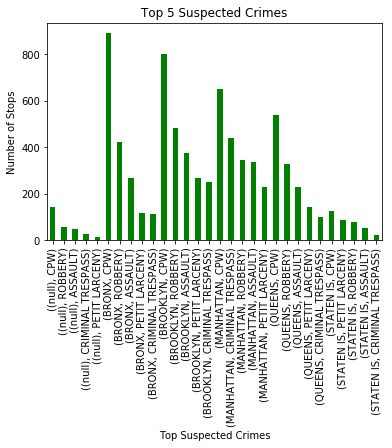

In [37]:

print(title)
crime.plot(kind = "bar", color = 'g')
plt.title("Top 5 Suspected Crimes")
plt.xlabel("Top Suspected Crimes")
plt.ylabel("Number of Stops")

In [23]:
#plt.bar("SUSPECTED_CRIME_DESCRIPTION", y_axis, color='r', alpha=0.5, align="center")

In [24]:
# Tell matplotlib where we would like to place each of our x axis headers
#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, ["Java", "C++", "Python", "Ruby", "Clojure"])

In [25]:
# Sets the x limits of the current chart
#plt.xlim(-0.75, len(x_axis)-0.25)

In [26]:
#plt.ylim(0, max(users)+5000)